In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
from shapely.geometry import Point as point

In [2]:
# load data
df = pd.read_csv("H:/FHV Accessibility/Research Projects/A Look into High Volume For-Hire Vehicles Accessibility/Data/2019-06_FHV_WAVs_on_the_road_2019-09-11_v01.csv")

C:\Users\changje\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Convert long and lat values to numeric
df['Pickup_longitude'] = pd.to_numeric(df['Pickup_longitude'], errors='coerce')
df['Pickup_latitude'] = pd.to_numeric(df['Pickup_latitude'], errors='coerce')

# Drop nulls
df.dropna(subset=['Pickup_longitude'], inplace=True)
df.dropna(subset=['Pickup_latitude'], inplace=True)
df.dropna(subset=['PUlocationID'], inplace=True)

# Check for nulls
df.apply(lambda x: x.isnull().sum())

yyyy_mm                            0
Plate_WAV_Status                   0
Dispatching_base_num               0
Origination_Base_number        26401
HVFHV_License_num                  0
Affiliated_base_number        132928
TLC_drivers_License_number         0
License_plate                      0
Pickup_longitude                   0
Pickup_latitude                    0
Dropoff_longitude                  0
Dropoff_latitude                   0
DateTimeID                         0
PUlocationID                       0
DOlocationID                       0
dtype: int64

In [4]:
# Remove coordinate outliers
df = df[df['Pickup_longitude'] <= -73.75]
df = df[df['Pickup_longitude'] >= -74.03]
df = df[df['Pickup_latitude'] <= 40.85]
df = df[df['Pickup_latitude'] >= 40.63]

In [5]:
print('Shape of df:', df.shape)

Shape of df: (118328, 15)


In [6]:
# Split data into features (x) and labels (y)
x = df[['Dropoff_longitude','Dropoff_latitude','DateTimeID','PUlocationID','DOlocationID']]
y = df[['Pickup_longitude','Pickup_latitude']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.70,test_size=0.30, random_state=0)

print ('Shape of x_train:', x_train.shape)
print ('Shape of y_train:', y_train.shape)
print('Shape of x_test:', x_test.shape)
print('Shape of y_test:', y_test.shape)
print('Shape of features:', x.shape)
print('Shape of labels:', y.shape)

Shape of x_train: (82829, 5)
Shape of y_train: (82829, 2)
Shape of x_test: (35499, 5)
Shape of y_test: (35499, 2)
Shape of features: (118328, 5)
Shape of labels: (118328, 2)


## Predictive Modeling

- **R-squared**: measures the strength of the relationship between the regression model and the dependent variable on a 0-100% scale. Usually, *the larger the $R^2$, the better the model fits the observations*.


- **Mean Absolute Error (MAE)**: measures the average magnitude of the errors in a set of predictions, without considering their direction on a scale from 0 to $\infty$. *Smaller values are better*. 


- **Mean Squared Error (MSE)**: measures how close a fitted line is to the data points. The squaring is for prevent negative values to cancel positive values. *The smaller the MSE, the closer the fit is to the data*. 


- **Root Mean Squared Error (RMSE)**: measures the average magnitude of the error on a scale from 0 to $\infty$. It's the square root of the average of squared differences between prediction and actual observations. RMSE is more appropriate for large errors. *Smaller values are better*.

### Linear Regression

In [7]:
# instantiate model object
lreg = LinearRegression()

# fit on training data
lreg.fit(x_train, y_train)
print(lreg)

# predict 
lreg_pred = lreg.predict(x_test)

# score it
r_squared_lreg = metrics.explained_variance_score(y_test,lreg_pred)
mae_lreg = metrics.mean_absolute_error(y_test,lreg_pred)
mse_lreg = metrics.mean_squared_error(y_test,lreg_pred)
rmse_lreg = np.sqrt(metrics.mean_squared_error(y_test,lreg_pred))

print('\nLinear Regression Performance Metrics')
print('R^2 =', r_squared_lreg)
print('MAE =', mae_lreg)
print('MSE =', mse_lreg)
print('RMSE =', rmse_lreg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Linear Regression Performance Metrics
R^2 = 0.5579141339855712
MAE = 0.025847240884598104
MSE = 0.0013854668683117469
RMSE = 0.03722186008667147


### Decision Tree

In [8]:
# instantiate model object
dtree = DecisionTreeRegressor()

# fit on training data
dtree.fit(x_train, y_train)
print(dtree)

# predict 
dtree_pred = dtree.predict(x_test)

# score it
r_squared_dtree = metrics.explained_variance_score(y_test,dtree_pred)
mae_dtree = metrics.mean_absolute_error(y_test,dtree_pred)
mse_dtree = metrics.mean_squared_error(y_test,dtree_pred)
rmse_dtree = np.sqrt(metrics.mean_squared_error(y_test,dtree_pred))

print('\nDecision Tree Performance Metrics')
print('R^2 =', r_squared_dtree)
print('MAE =', mae_dtree)
print('MSE =', mse_dtree)
print('RMSE =', rmse_dtree)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

Decision Tree Performance Metrics
R^2 = 0.9414811337663203
MAE = 0.00613464472603486
MSE = 0.0001855469390646814
RMSE = 0.013621561550155746


### Random Forest

In [9]:
# instantiate model object
rforest = RandomForestRegressor(n_estimators = 20, n_jobs = -1)

# fit on training data
rforest.fit(x_train, y_train)
print(rforest)

# predict 
rforest_pred = rforest.predict(x_test)

# score it
r_squared_rforest = metrics.explained_variance_score(y_test,rforest_pred)
mae_rforest = metrics.mean_absolute_error(y_test,rforest_pred)
mse_rforest = metrics.mean_squared_error(y_test,rforest_pred)
rmse_rforest = np.sqrt(metrics.mean_squared_error(y_test,rforest_pred))

print('\nRandom Forest Performance Metrics')
print('R^2 =', r_squared_rforest)
print('MAE =', mae_rforest)
print('MSE =', mse_rforest)
print('RMSE =', rmse_rforest)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

Random Forest Performance Metrics
R^2 = 0.9572720376873352
MAE = 0.00554593758964313
MSE = 0.00013634589750336864
RMSE = 0.011676724605100894


In [10]:
model_pred = pd.DataFrame()
model_pred['Model Name'] = ['Linear Regression','Decision Tree','Random Forest']
model_pred['R^2'] = [r_squared_lreg, r_squared_dtree, r_squared_rforest]
model_pred['MAE'] = [mae_lreg, mae_dtree, mae_rforest]
model_pred['MSE'] = [mse_lreg, mse_dtree, mse_rforest]
model_pred['RMSE'] = [rmse_lreg, rmse_dtree, rmse_rforest]
model_pred

,Model Name,R^2,MAE,MSE,RMSE
0,Linear Regression,0.557914,0.025847,0.001385,0.037222
1,Decision Tree,0.941481,0.006135,0.000186,0.013622
2,Random Forest,0.957272,0.005546,0.000136,0.011677


<Figure size 3600x3600 with 0 Axes>

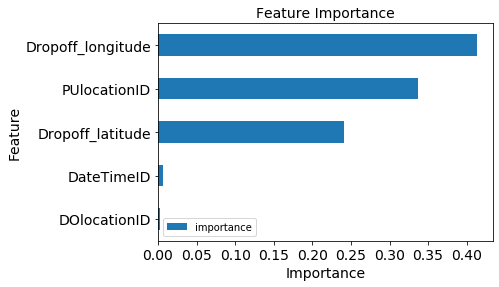

In [11]:
# plot of feature importance
plt.figure(figsize=(50,50))
pd.DataFrame({'feature':x_train.columns, 'importance':rforest.feature_importances_}).sort_values('importance').set_index('feature').plot(kind='barh', fontsize=14)

plt.title('Feature Importance', fontsize=14)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.show()

In [12]:
# convert array to dataframe
rforest_pred = pd.DataFrame(rforest_pred)
rforest_pred.columns = ['Pickup_longitude','Pickup_latitude']

# Convert long and lat values to numeric
rforest_pred['Pickup_longitude'] = pd.to_numeric(rforest_pred['Pickup_longitude'], errors='coerce')
rforest_pred['Pickup_latitude'] = pd.to_numeric(rforest_pred['Pickup_latitude'], errors='coerce')

rforest_pred.head()

,Pickup_longitude,Pickup_latitude
0,-73.859520,40.739230
1,-73.976781,40.759156
2,-73.948768,40.788445
3,-73.988457,40.721097
4,-73.959716,40.766848


In [13]:
# export pred data as csv
rforest_pred.to_csv("H:/FHV Accessibility/Research Projects/A Look into High Volume For-Hire Vehicles Accessibility/Data/HVFHV Accessibility Predictive Coordinates.csv")